In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [36]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [4]:
col_trans = ColumnTransformer([
    ("trans1" , OneHotEncoder() , df["Fuel_Type"] )
])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [37]:
df["age_of_car"] = 2024 - df["Year"]
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [6]:
df.Owner.unique()

array([0, 1, 3], dtype=int64)

In [7]:
df.Transmission.unique() #Encode the data into Numerical columns

array(['Manual', 'Automatic'], dtype=object)

In [38]:
df.drop("Car_Name",inplace = True,axis = 1)


In [39]:
df.drop("Year",inplace = True,axis = 1)


In [40]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [41]:
df.Seller_Type.unique() # Encode the data 

array(['Dealer', 'Individual'], dtype=object)

# Outlier Detection 

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

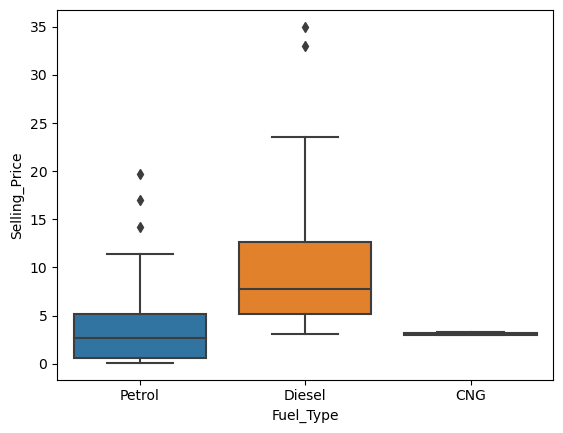

In [42]:
num_col = df.select_dtypes(exclude='object').columns
sns.boxplot(data = df , x = "Fuel_Type" , y = "Selling_Price")

In [50]:
ohe = OneHotEncoder(sparse_output= False,drop="first").set_output(transform="pandas")
x = ohe.fit_transform(df[["Fuel_Type"]])
x

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
296,1.0,0.0
297,0.0,1.0
298,0.0,1.0
299,1.0,0.0


In [51]:
df = pd.concat([df,x],axis = 1)

In [52]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,0.0,1.0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,1.0,0.0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,0.0,1.0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13,0.0,1.0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8,1.0,0.0
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9,0.0,1.0
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15,0.0,1.0
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7,1.0,0.0


In [54]:
y = ohe.fit_transform(df[["Seller_Type","Transmission"]])

In [55]:
df = pd.concat([df,y] ,axis=1)

In [56]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8,1.0,0.0,0.0,1.0
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9,0.0,1.0,0.0,1.0
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15,0.0,1.0,0.0,1.0
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7,1.0,0.0,0.0,1.0


In [59]:
x_data = df.loc[:,["Present_Price","Kms_Driven","Owner","age_of_car","Fuel_Type_Diesel","Fuel_Type_Petrol","Seller_Type_Individual","Transmission_Manual"]]
x_data

,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,0.0,1.0,0.0,1.0
1,9.54,43000,0,11,1.0,0.0,0.0,1.0
2,9.85,6900,0,7,0.0,1.0,0.0,1.0
3,4.15,5200,0,13,0.0,1.0,0.0,1.0
4,6.87,42450,0,10,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,8,1.0,0.0,0.0,1.0
297,5.90,60000,0,9,0.0,1.0,0.0,1.0
298,11.00,87934,0,15,0.0,1.0,0.0,1.0
299,12.50,9000,0,7,1.0,0.0,0.0,1.0


In [61]:
y_data = df[["Selling_Price"]]
y_data

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [63]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size=0.2)
y_train

,Selling_Price
257,8.50
161,0.45
220,3.50
244,5.95
222,6.00
...,...
269,6.70
166,0.45
1,4.75
152,0.50


In [64]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [65]:
pred = lr.predict(x_test)
pred

array([[ 3.97269765e+00],
       [ 1.06976420e+00],
       [ 8.51850591e+00],
       [ 1.79243193e+00],
       [ 9.19443653e+00],
       [ 7.22306055e+00],
       [ 2.84215425e-01],
       [ 9.56679227e+00],
       [ 7.90285099e+00],
       [ 4.77297472e+00],
       [ 1.44430682e+01],
       [ 1.88100516e+00],
       [ 1.86509208e+00],
       [ 6.54608593e-01],
       [-5.83045888e-01],
       [ 4.22076438e+00],
       [ 4.75480570e+01],
       [ 2.39063274e+00],
       [ 6.88854756e+00],
       [ 7.54208004e+00],
       [ 1.42844370e+00],
       [ 9.28970858e-01],
       [ 6.31182239e+00],
       [ 1.03530403e+01],
       [ 1.77067751e+00],
       [ 5.14050657e+00],
       [ 8.57428213e+00],
       [ 1.26435888e+00],
       [ 9.41713780e+00],
       [-1.29928197e-01],
       [ 3.96758124e+00],
       [-6.41778196e-01],
       [ 6.29373440e+00],
       [ 9.03139067e+00],
       [ 2.53463192e-02],
       [ 1.45620156e+00],
       [ 5.50865276e+00],
       [-2.07746633e+00],
       [ 6.4

In [69]:
lr.score(x_test,y_test)

0.8762194236842085

In [72]:
lr.coef_

array([[ 5.09156551e-01, -7.36454633e-06, -7.97322803e-01,
        -4.03760584e-01,  2.07356330e+00,  4.85595820e-01,
        -5.96567240e-01, -5.24152516e-01]])

In [73]:
lr.intercept_

array([5.07783232])